**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from google.colab import files

**DATA ACQUISITION**

In [ ]:
uploaded=files.upload()

Saving Crop_dataset.csv to Crop_dataset.csv


In [ ]:
df=pd.read_csv('Crop_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print(df.shape)

(2200, 8)


In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
print("Duplicate Rows:",df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


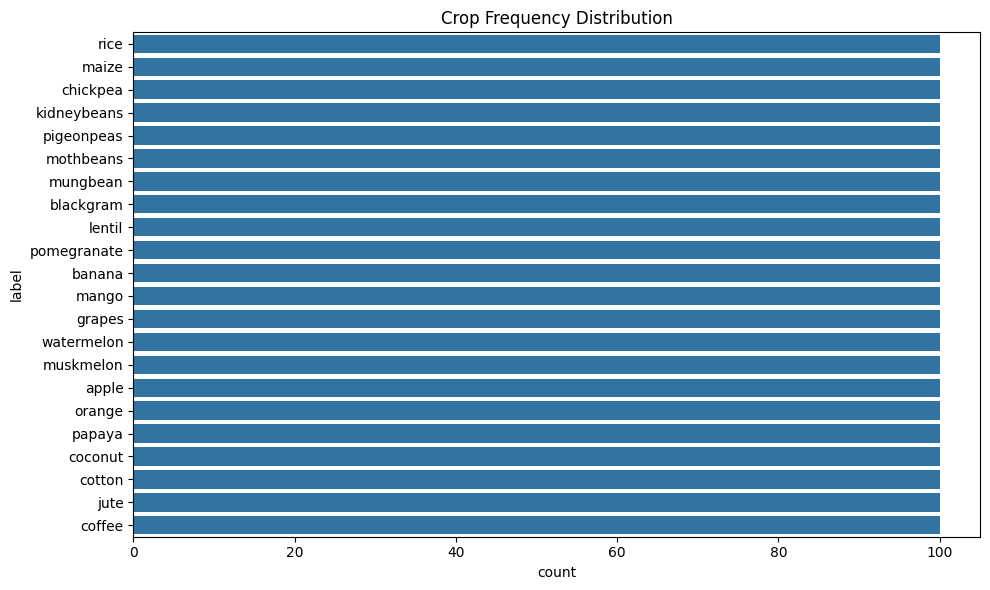

In [ ]:
print(df['label'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(data=df,y='label',order=df['label'].value_counts().index)
plt.title("Crop Frequency Distribution")
plt.tight_layout()
plt.show()

**DATA EXPLORATION AND VISUALIZATION**

Boxplots

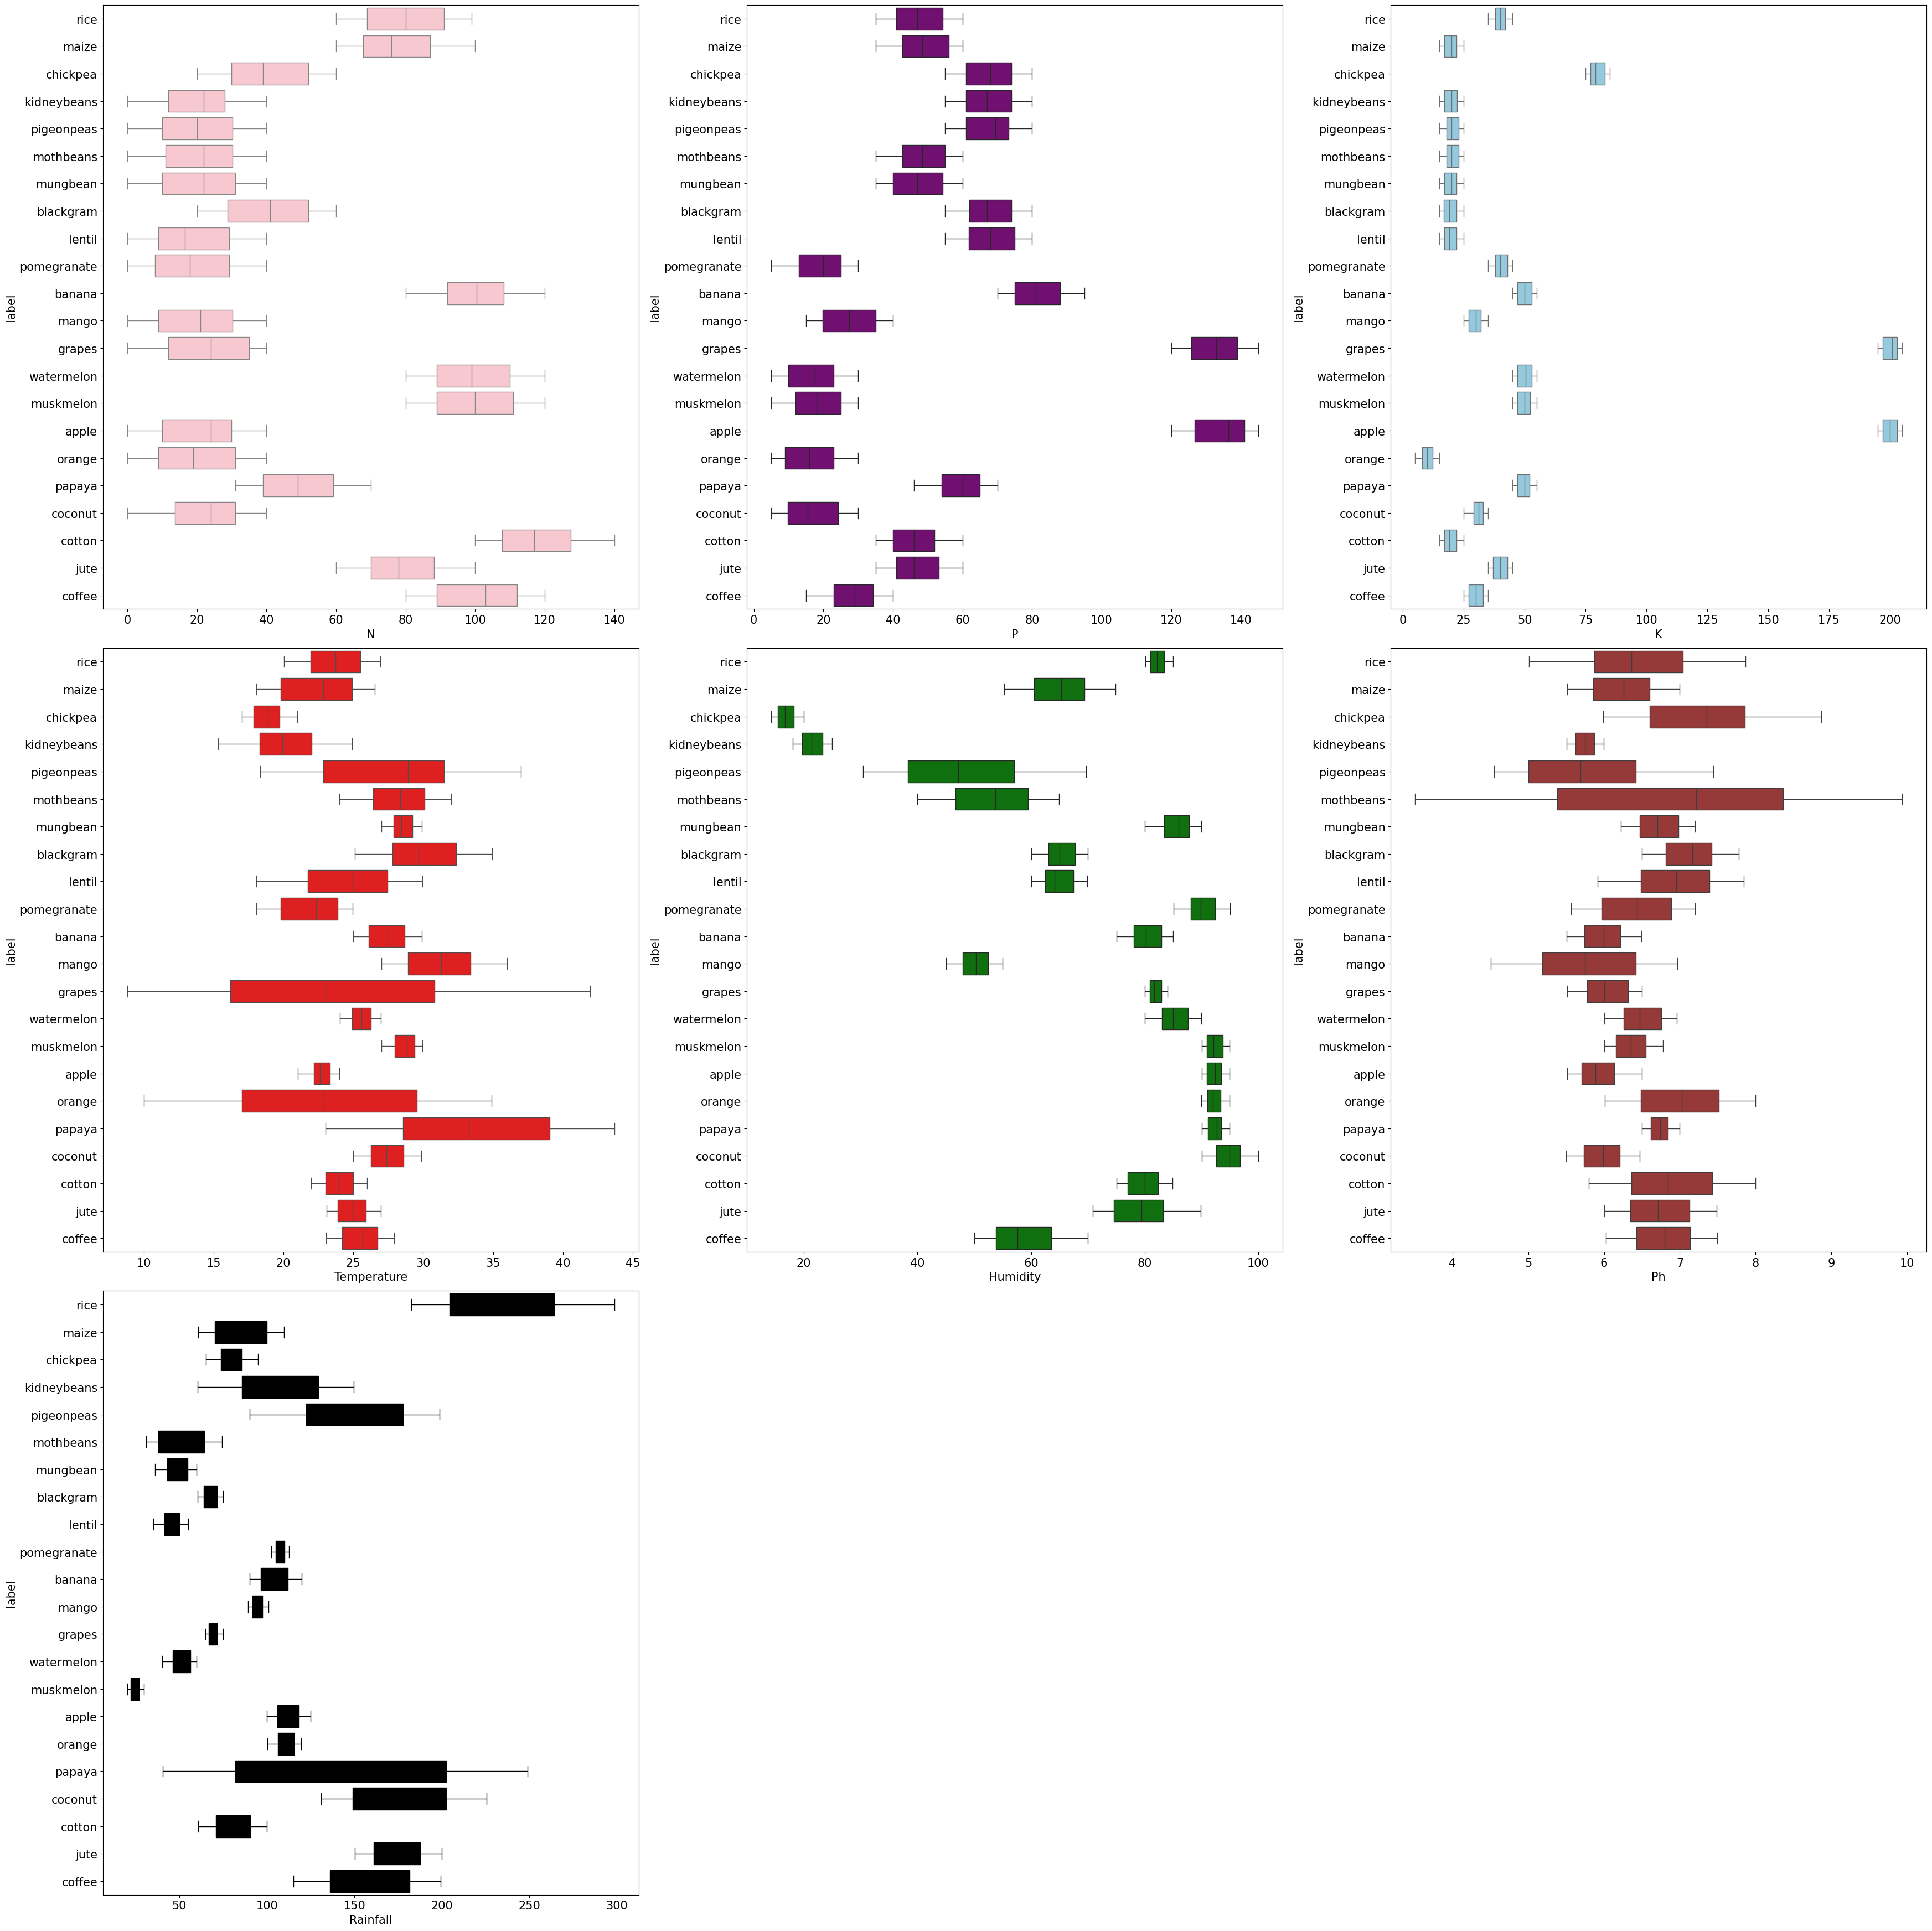

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(35,35)) # Creates a 3X3 grid of subplots

features=['N','P','K','temperature','humidity','ph','rainfall']
colors=['pink','purple','skyblue','red','green','brown','black']
positions=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0)]

for feature, color, (i,j) in zip(features,colors,positions):
    sns.boxplot(x=feature,data=df,y='label',ax=ax[i][j],color=color)
    ax[i][j].set_xlabel(feature.capitalize(),fontsize=15)
    ax[i][j].set_ylabel('label',fontsize=15)
    ax[i][j].tick_params(axis='x',labelsize=15)
    ax[i][j].tick_params(axis='y',labelsize=15)


ax[2][1].set_axis_off()
ax[2][2].set_axis_off()

plt.tight_layout()
plt.show()

Bar Chart

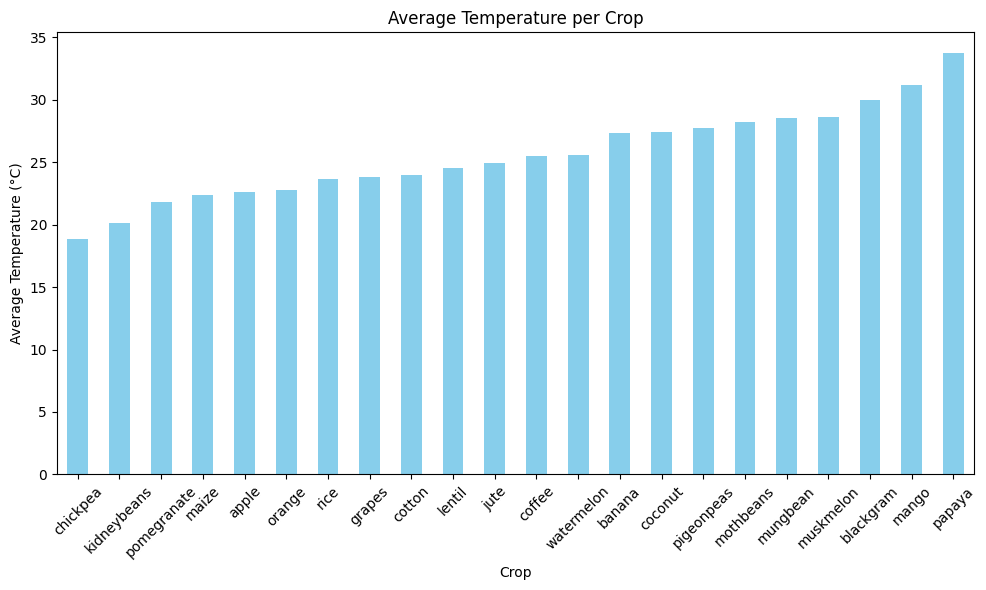

In [ ]:
plt.figure(figsize=(10,6))
avg_temp=df.groupby('label')['temperature'].mean().sort_values()
avg_temp.plot(kind='bar',color='skyblue')
plt.title('Average Temperature per Crop')
plt.xlabel('Crop')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

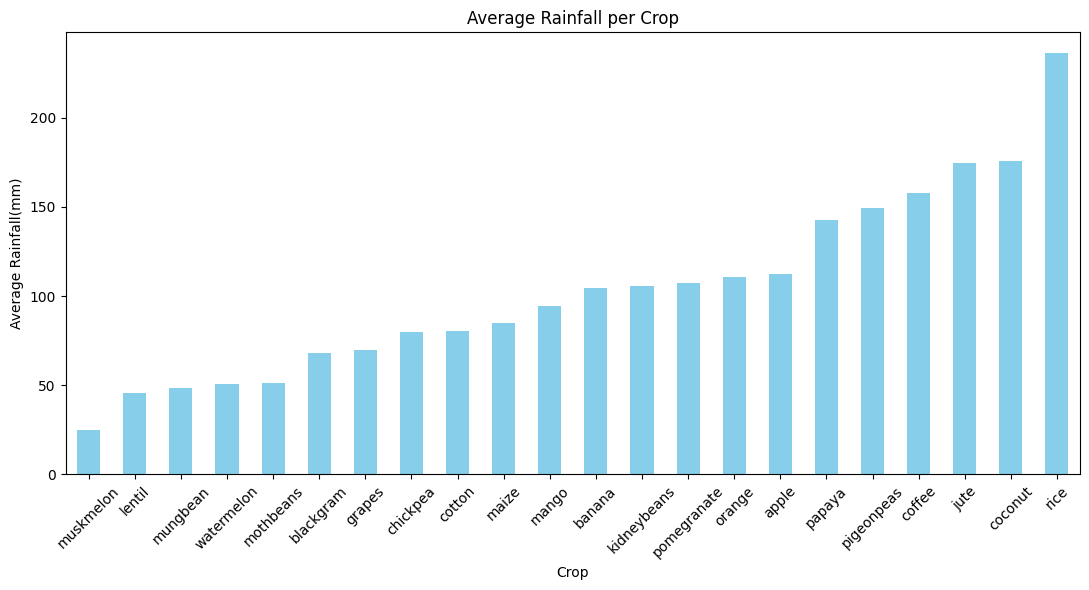

In [ ]:
plt.figure(figsize=(11,6))
avg_temp=df.groupby('label')['rainfall'].mean().sort_values()
avg_temp.plot(kind='bar',color='skyblue')
plt.title('Average Rainfall per Crop')
plt.xlabel('Crop')
plt.ylabel('Average Rainfall(mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

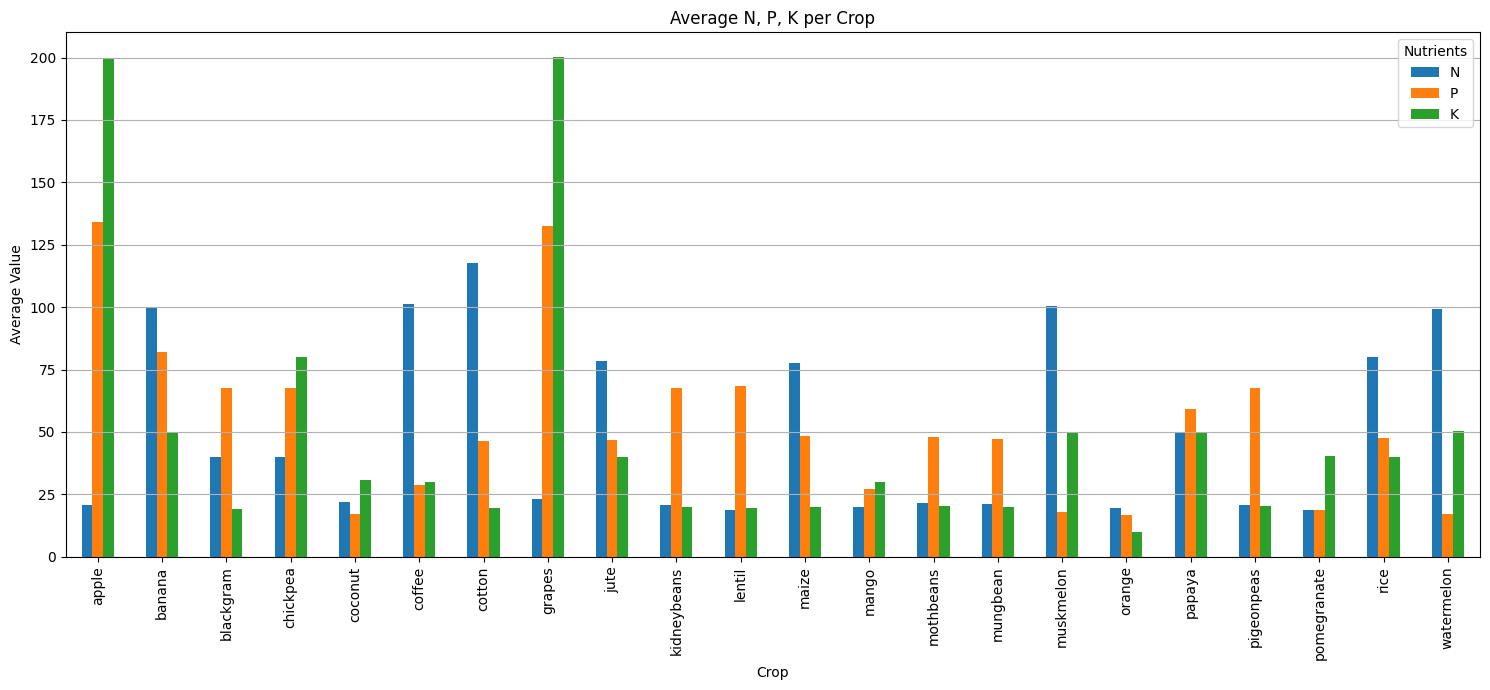

In [ ]:
# Grouped Bar Chart
avg=df.groupby('label')[['N','P','K']].mean()

# Plot Grouped Bar Chart
avg.plot(kind='bar',figsize=(15,7))

plt.title('Average N, P, K per Crop')
plt.xlabel('Crop')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.legend(title='Nutrients')
plt.grid(True,axis='y')
plt.tight_layout()
plt.show()

Histograms

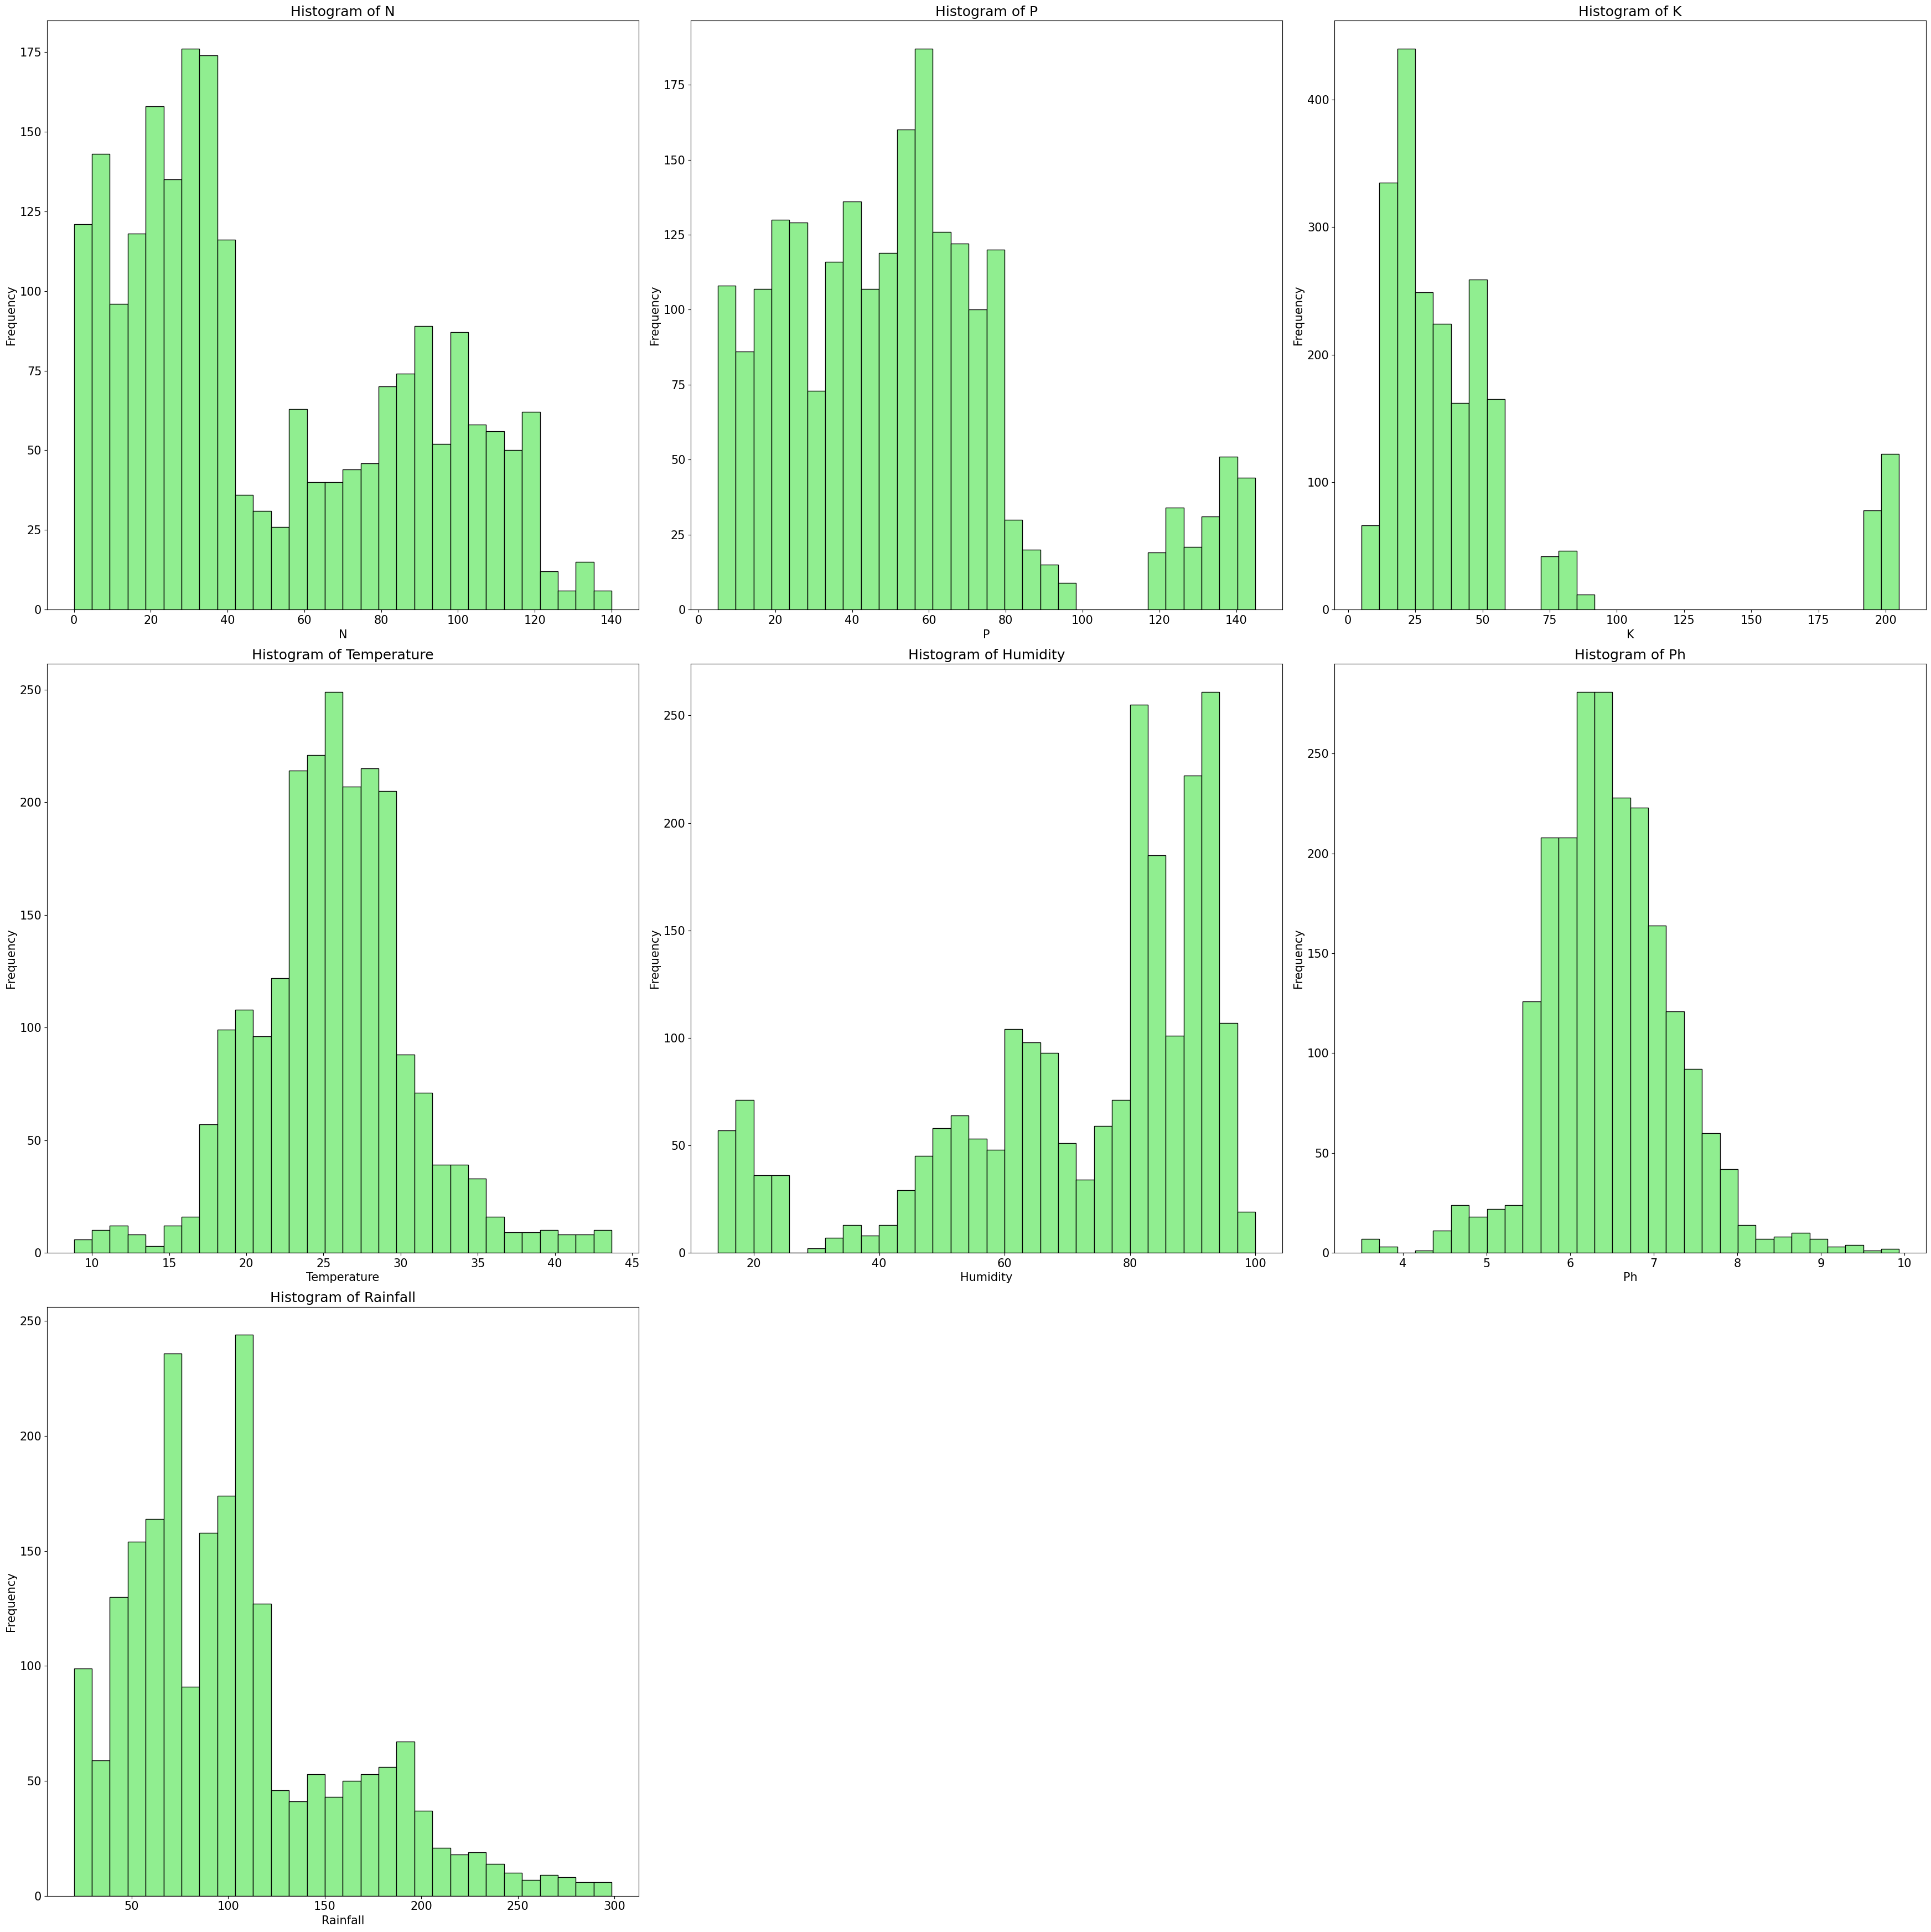

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(35,35))

features=['N','P','K','temperature','humidity','ph','rainfall']
positions=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0)]

for feature, (i,j) in zip(features,positions):
    ax[i][j].hist(df[feature],bins=30,color='lightgreen',edgecolor='black')
    ax[i][j].set_xlabel(feature.capitalize(),fontsize=15)
    ax[i][j].set_ylabel('Frequency',fontsize=15)
    ax[i][j].tick_params(axis='x',labelsize=15)
    ax[i][j].tick_params(axis='y',labelsize=15)
    ax[i][j].set_title(f'Histogram of {feature.capitalize()}',fontsize=18)


ax[2][1].set_axis_off()
ax[2][2].set_axis_off()

plt.tight_layout()
plt.show()

Pairplots

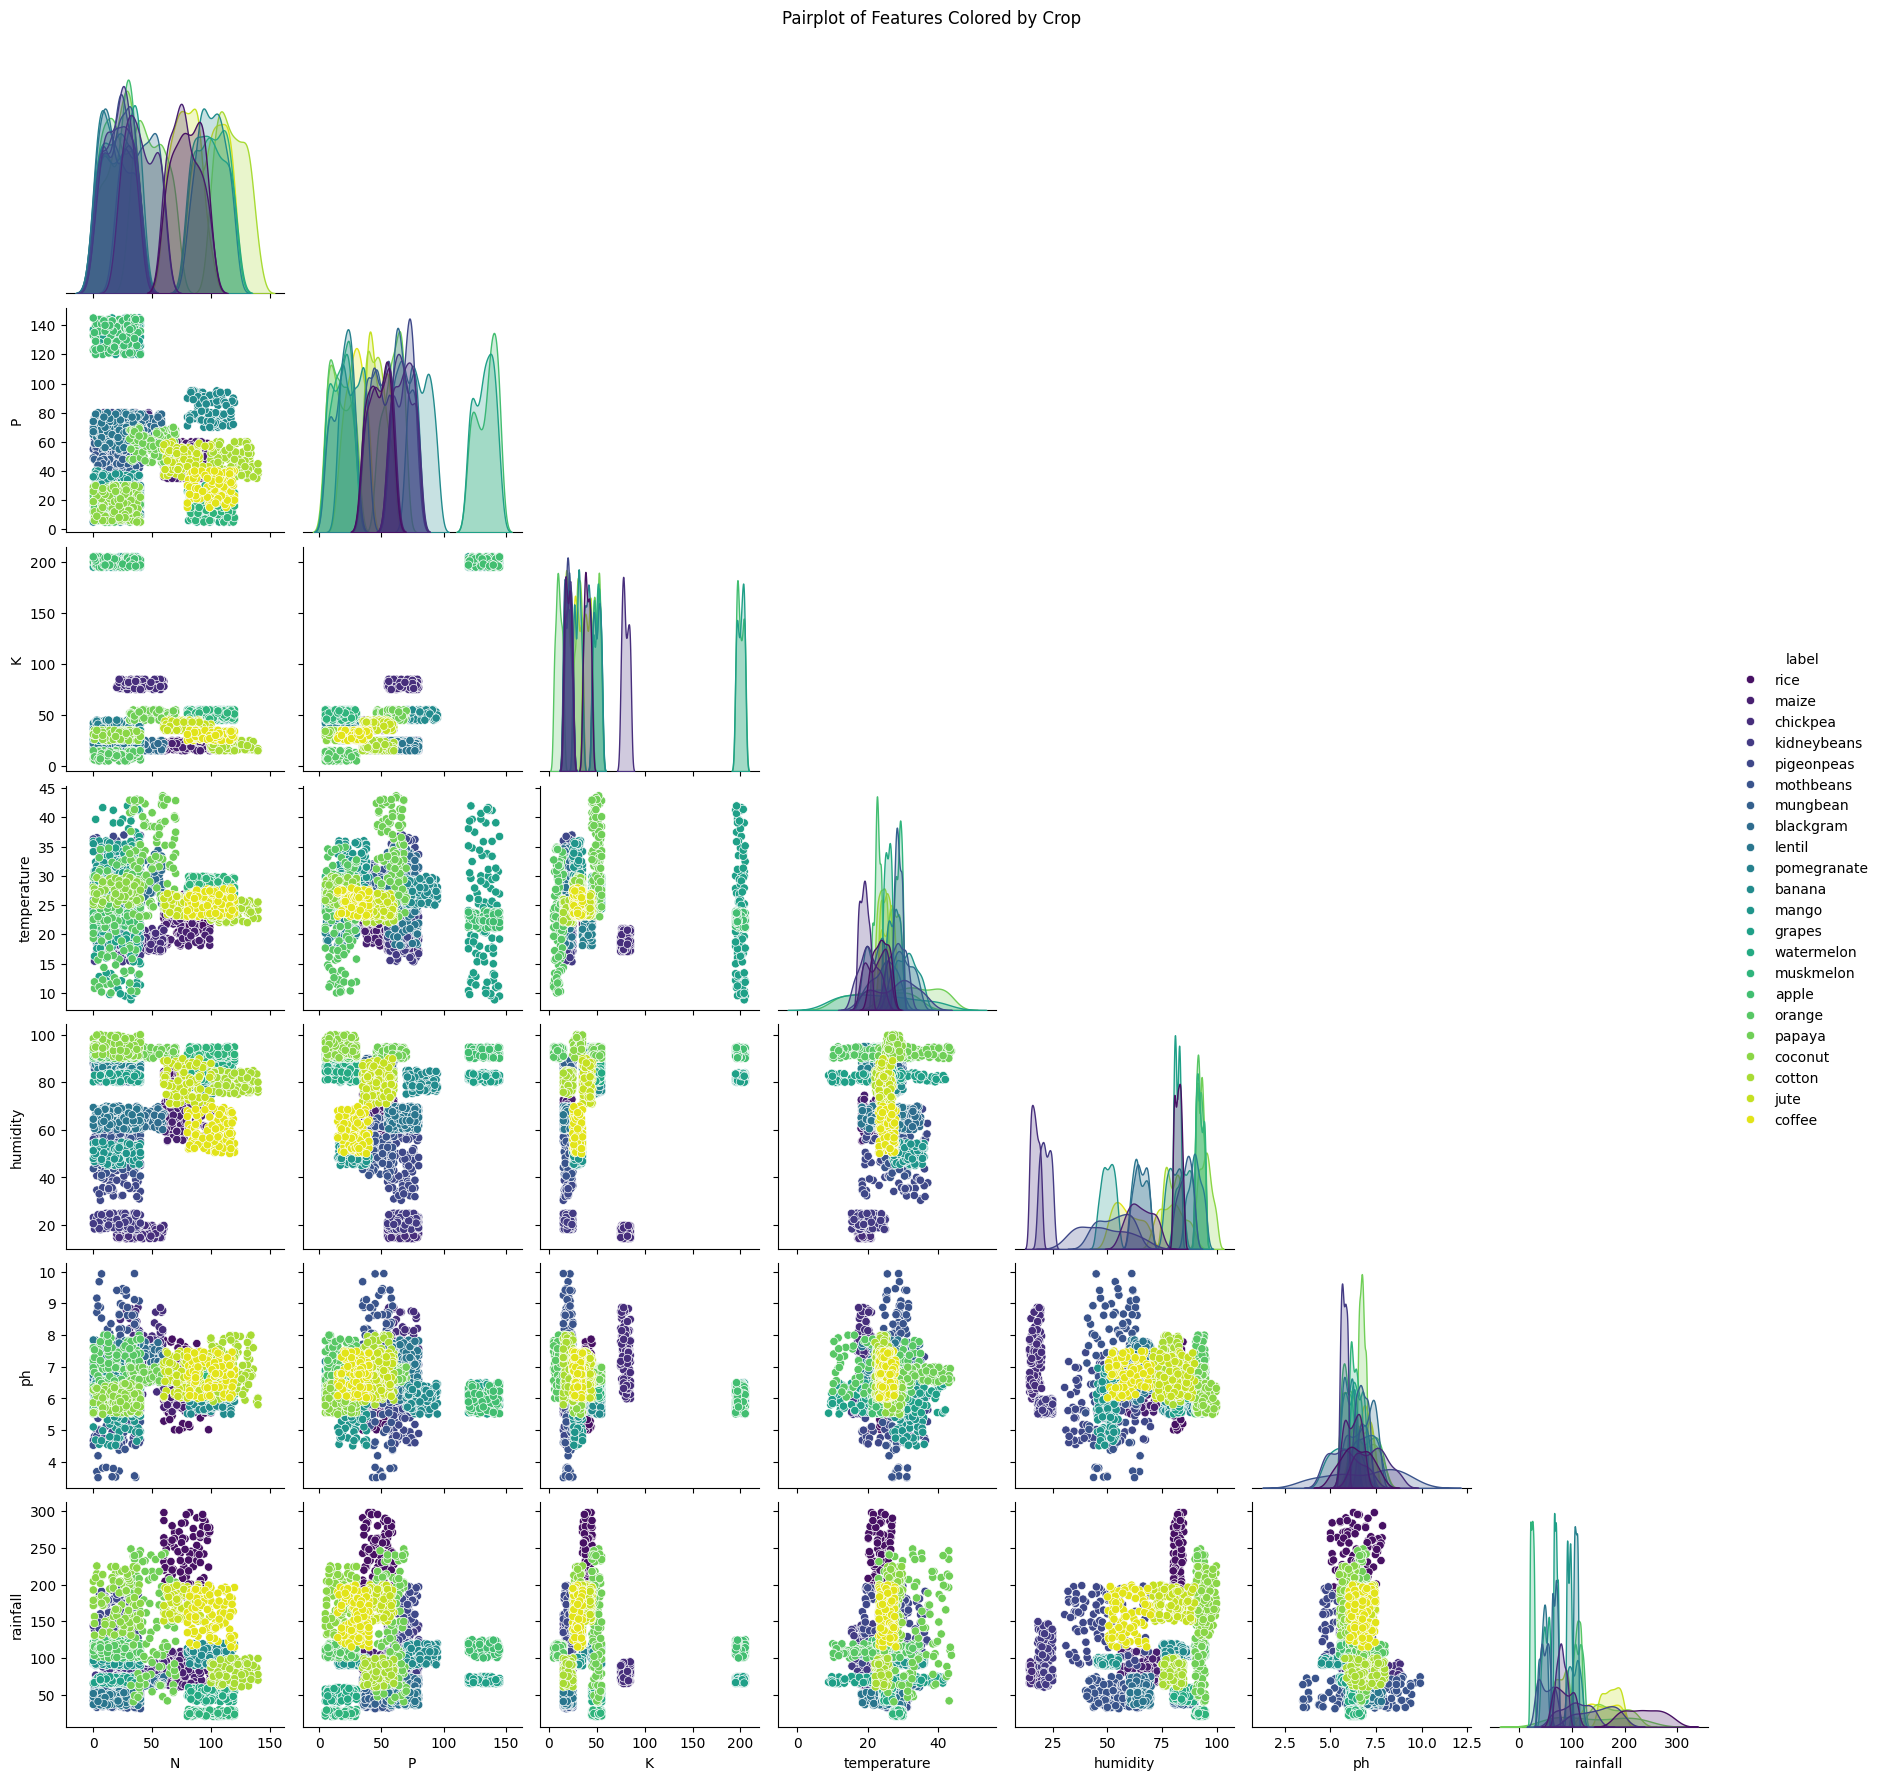

In [ ]:
features=['N','P','K','temperature','humidity','ph','rainfall','label']
sns.pairplot(df[features],hue='label',corner=True,palette='viridis')
plt.suptitle('Pairplot of Features Colored by Crop',y=1.02)
plt.show()

Heatmap

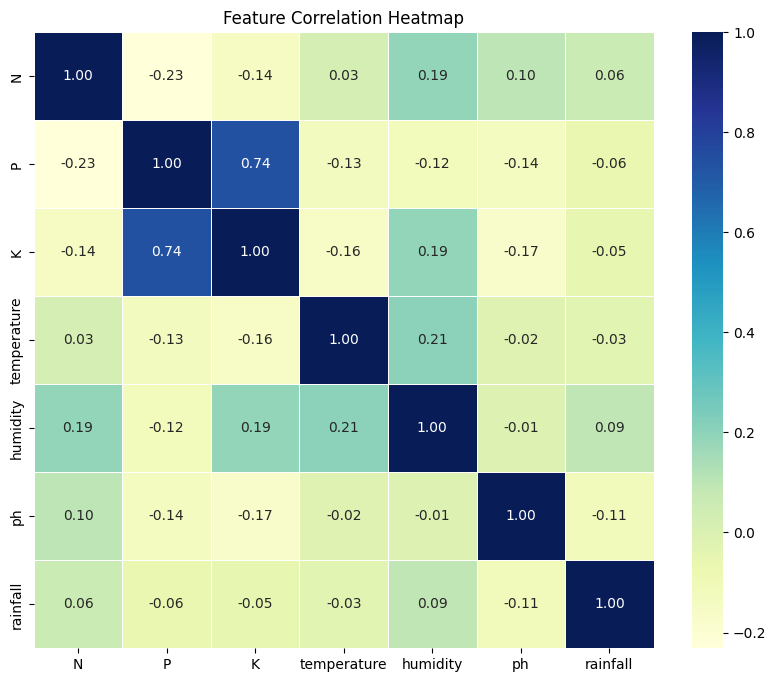

In [ ]:
features=['N','P','K','temperature','humidity','ph','rainfall']
corr_matrix=df[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu',linewidths=0.5,fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

3D Scatter Plot

In [ ]:
fig=px.scatter_3d(df,x='temperature',y='humidity',z='rainfall',color='label')
fig.update_layout(title='3D Climate Parameters by Crop')
fig.show()

**FEATURE SCALING**

In [ ]:
X=df.drop('label',axis=1)
y=df['label']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

**TRAIN TEST SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

**MODEL TRAINING AND EVALUATION**

Define Models

In [ ]:
models={
    "Logistic Regression":LogisticRegression(max_iter=300),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVM":SVC(),
    "Naive Bayes":GaussianNB()
       }

Training and Testing

In [ ]:
metrics=[]
f1_scores={}


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.88      0.92      0.90        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       0.96      1.00      0.98        26
      cotton       0.95      1.00      0.98        21
      grapes       1.00      1.00      1.00        19
        jute       0.75      0.89      0.81        27
 kidneybeans       0.96      0.96      0.96        24
      lentil       0.83      1.00      0.91        15
       maize       1.00      0.96      0.98        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.92      0.96        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00  

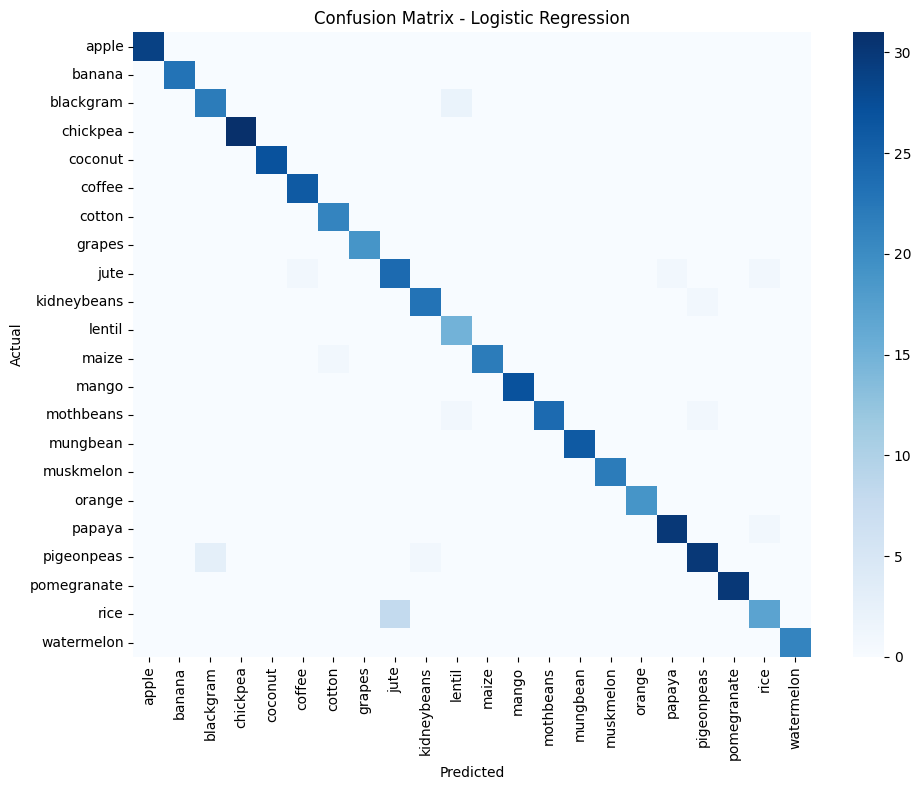


K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.88      0.96      0.92        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       0.91      1.00      0.95        21
      grapes       1.00      1.00      1.00        19
        jute       0.77      1.00      0.87        27
 kidneybeans       0.92      1.00      0.96        24
      lentil       0.75      1.00      0.86        15
       maize       1.00      0.91      0.95        23
       mango       0.93      1.00      0.96        27
   mothbeans       1.00      0.85      0.92        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      0.95  

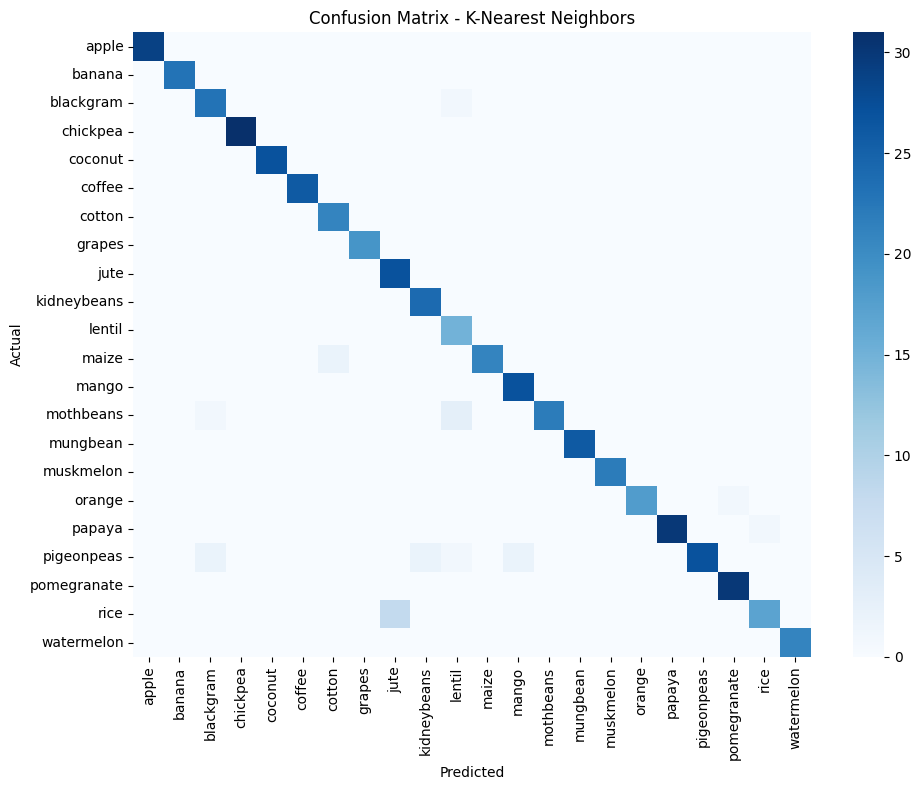


Decision Tree - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.96      1.00      0.98        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.84      0.96      0.90        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      0.96      0.98        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.92      0.96        26
    mungbean       0.96      1.00      0.98        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.

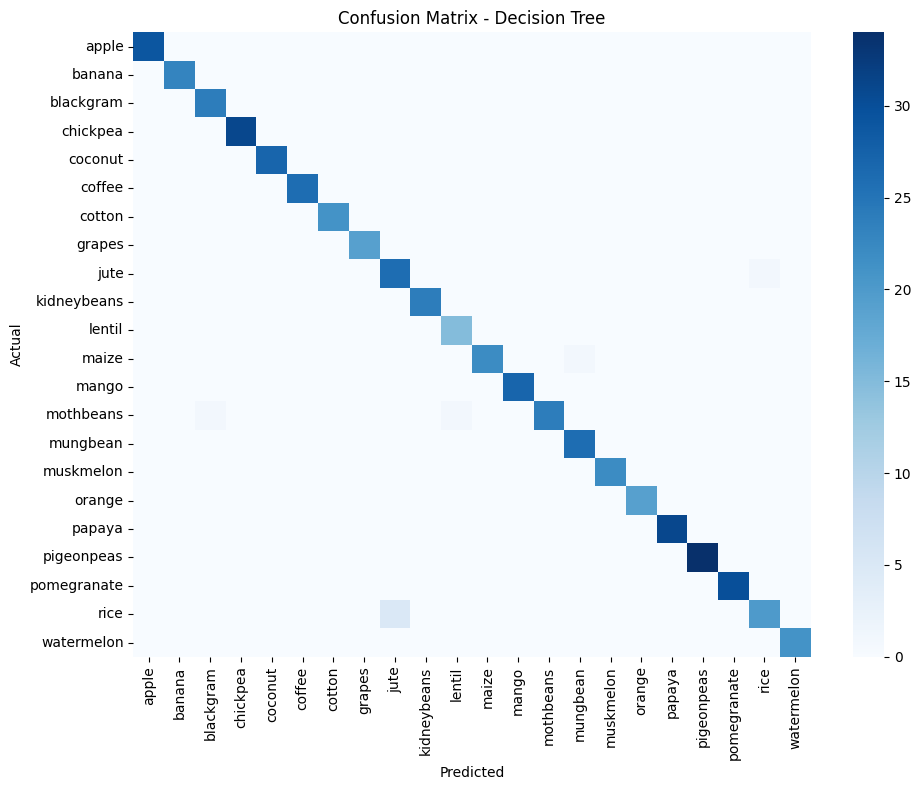


Random Forest - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.84      1.00      0.92        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.

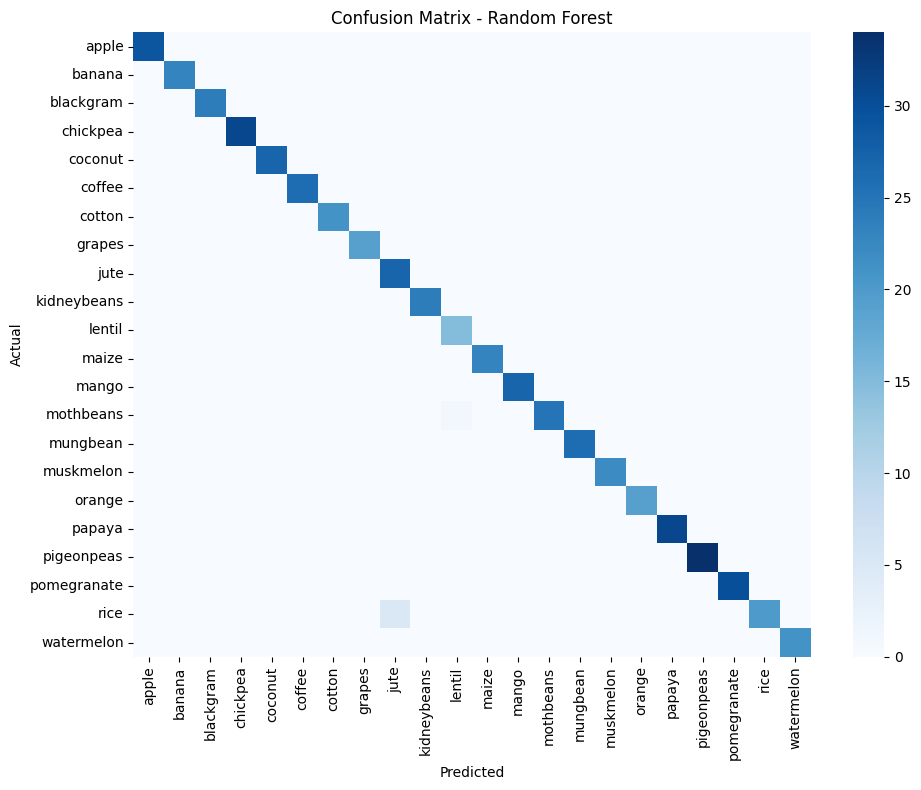


SVM - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.92      0.96      0.94        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       0.96      1.00      0.98        26
      cotton       0.91      1.00      0.95        21
      grapes       1.00      1.00      1.00        19
        jute       0.74      0.96      0.84        27
 kidneybeans       0.92      1.00      0.96        24
      lentil       0.83      1.00      0.91        15
       maize       1.00      0.91      0.95        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      0.92      0.96        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        

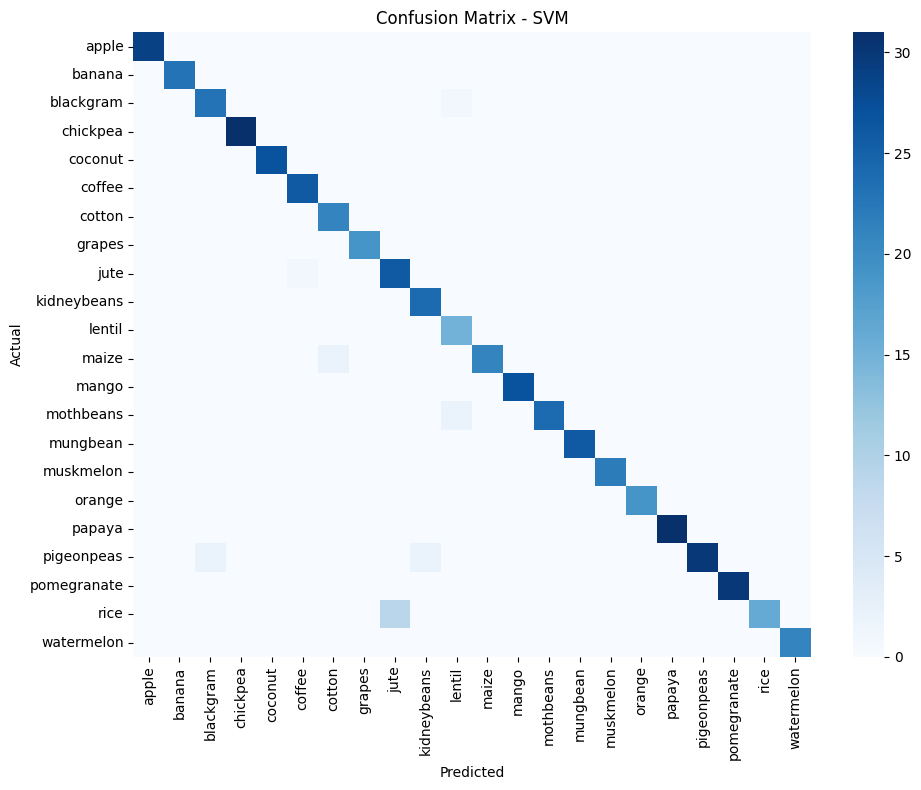


Naive Bayes - Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.87      1.00      0.93        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00

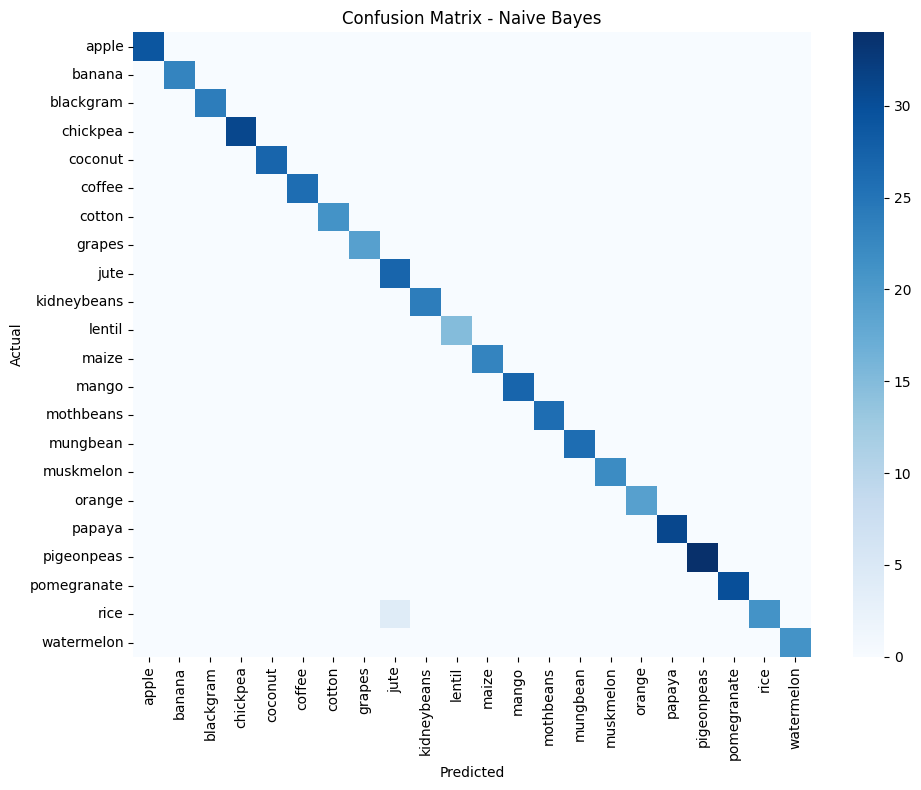

In [ ]:
for name, model in models.items():
    model.fit(X_train,y_train)
    preds=model.predict(X_test)

    acc=accuracy_score(y_test,preds)
    prec=precision_score(y_test,preds,average='macro')
    rec=recall_score(y_test,preds,average='macro')
    f1=f1_score(y_test,preds,average='macro')

    metrics.append({
        "Model":name,
        "Accuracy":round(acc,4),
        "Precision":round(prec,4),
        "Recall":round(rec,4),
        "F1 Score":round(f1,4)
                  })

    f1_scores[name]=f1  # Save for later selection

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test,preds))

    # Confusion matrix heatmap (optional)
    cm=confusion_matrix(y_test,preds,labels=np.unique(y))
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=False,cmap="Blues",xticklabels=np.unique(y),yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

Model Comparision Table

In [ ]:
metrics_df=pd.DataFrame(metrics)
print("Model Comparison:\n")
print(metrics_df.sort_values(by="F1 Score",ascending=False).reset_index(drop=True))

Model Comparison:

                 Model  Accuracy  Precision  Recall  F1 Score
0          Naive Bayes    0.9927     0.9941  0.9927    0.9929
1        Random Forest    0.9891     0.9901  0.9892    0.9887
2        Decision Tree    0.9855     0.9858  0.9857    0.9852
3                  SVM    0.9655     0.9680  0.9673    0.9643
4  Logistic Regression    0.9600     0.9609  0.9624    0.9602
5  K-Nearest Neighbors    0.9564     0.9584  0.9594    0.9552


Select Best Model

In [ ]:
best_model_name=max(f1_scores,key=f1_scores.get)
best_model=models[best_model_name]
print(f"Best Performing Model: {best_model_name}")

Best Performing Model: Naive Bayes


Crop Prediction Function (Fixed)

In [ ]:
def predict_crop(N,P,K,temp,humidity,pH,rainfall):
    input_dict={
        "N":[N],
        "P":[P],
        "K":[K],
        "temperature":[temp],
        "humidity":[humidity],
        "ph":[pH],
        "rainfall":[rainfall]
               }
    input_df=pd.DataFrame(input_dict)
    scaled=scaler.transform(input_df)
    prediction=best_model.predict(scaled)
    return prediction[0]


Sample Prediction

In [ ]:
print("Sample Crop Prediction:")
sample_result=predict_crop(90,40,40,25.0,80.0,6.5,200.0)
print(f"Recommended Crop: {sample_result}")

Sample Crop Prediction:
Recommended Crop: jute


Sample Prediction by inputing data

In [ ]:
print("Enter values to predict the best crop:")

try:
    N=float(input("Enter Nitrogen content (N): "))
    P=float(input("Enter Phosphorus content (P): "))
    K=float(input("Enter Potassium content (K): "))
    temp=float(input("Enter Temperature (in °C): "))
    humidity=float(input("Enter Humidity (in %): "))
    ph=float(input("Enter pH value of soil: "))
    rainfall=float(input("Enter Rainfall (in mm): "))

    user_crop=predict_crop(N,P,K,temp,humidity,ph,rainfall)
    print(f"\nBased on the inputs, the recommended crop is: {user_crop.upper()}")

except ValueError:
    print(" Please enter valid numeric values for all inputs.")

# You can enter this - 50, 20, 20, 22.0, 60.0, 5.5, 100.0

Enter values to predict the best crop:
Enter Nitrogen content (N): 50
Enter Phosphorus content (P): 20
Enter Potassium content (K): 20
Enter Temperature (in °C): 22.0
Enter Humidity (in %): 60.0
Enter pH value of soil: 5.5
Enter Rainfall (in mm): 100.0

Based on the inputs, the recommended crop is: MAIZE


**DATA FROM OpenWeatherMap API**

In [ ]:
import requests
import pandas as pd

# Your API Key
API_KEY="7de38bc856a30142649ba29554d2213d"

# List of cities
cities=["Delhi", "Mumbai", "Agra", "Lucknow", "Kanpur", "Dehradun", "Nagpur", "Chandigarh", "Bengaluru", "Bhopal", "Palanpur", "Darjeeling"]

# Initialize list to store weather data
weather_data_list=[]

# Loop through each city and get weather info
for city in cities:
    url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response=requests.get(url)
    data=response.json()

    if response.status_code == 200:
        temperature = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        description = data["weather"][0]["description"]
        latitude = data["coord"]["lat"]
        longitude = data["coord"]["lon"]

        weather_data_list.append({
            "City": city,
            "Latitude": latitude,
            "Longitude": longitude,
            "Temperature (°C)": temperature,
            "Humidity (%)": humidity,
            "Weather Description": description
        })
    else:
        weather_data_list.append({
            "City": city,
            "Latitude": None,
            "Longitude": None,
            "Temperature (°C)": None,
            "Humidity (%)": None,
            "Weather Description": "Error"
        })

# Convert to DataFrame
df=pd.DataFrame(weather_data_list)

# Print the DataFrame
print(df)


          City  Latitude  Longitude  Temperature (°C)  Humidity (%)  \
0        Delhi   28.6667    77.2167             29.05            84   
1       Mumbai   19.0144    72.8479             27.99            78   
2         Agra   27.1833    78.0167             28.76            81   
3      Lucknow   26.8500    80.9167             28.99            94   
4       Kanpur   26.4667    80.3500             28.75            81   
5     Dehradun   30.3256    78.0437             24.14            92   
6       Nagpur   21.1500    79.1000             25.01            88   
7   Chandigarh   30.7343    76.7933             27.02            82   
8    Bengaluru   12.9762    77.6033             21.64            88   
9       Bhopal   23.2667    77.4000             23.13            94   
10    Palanpur   24.1667    72.4333             28.16            73   
11  Darjeeling   27.0333    88.2667             18.27            97   

   Weather Description  
0                 mist  
1              drizzle  
2

**PREDICTION OF CROP FROM API**

In [ ]:
def fetch_weather(city):
    API_KEY="7de38bc856a30142649ba29554d2213d"
    url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response=requests.get(url)
    data=response.json()

    if response.status_code == 200:
        temperature = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        return temperature,humidity
    else:
        raise Exception("Failed to fetch weather data")

#Sample City-Based Prediction
try:
    city="Kanpur"
    temp,humidity=fetch_weather(city)

    # Default or average values for other inputs
    N, P, K = 90, 40, 40
    pH = 6.5
    rainfall = 200.0

    print(f"Weather in {city}: {temp}°C,{humidity}% humidity")
    crop_result=predict_crop(N,P,K,temp,humidity,pH,rainfall)
    print(f"Based on live weather, recommended crop: {crop_result}")
except Exception as e:
    print(str(e))

Weather in Kanpur: 28.75°C,81% humidity
Based on live weather, recommended crop: rice


**Python Script for Power BI**

In [ ]:
import requests
import pandas as pd

API_KEY="7de38bc856a30142649ba29554d2213d"
cities=["Delhi", "Mumbai", "Agra", "Lucknow", "Kanpur", "Dehradun", "Nagpur", "Chandigarh", "Bengaluru", "Bhopal", "Palanpur", "Darjeeling"]

weather_list=[]

for city in cities:
    url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response=requests.get(url)
    data=response.json()

    if response.status_code==200:
        weather={
            "City":city,
            "Latitude":data["coord"]["lat"],
            "Longitude":data["coord"]["lon"],
            "Temperature (°C)":data["main"]["temp"],
            "Humidity (%)":data["main"]["humidity"],
            "Condition":data["weather"][0]["description"]
                }
        weather_list.append(weather)
    else:
        weather_list.append({
            "City":city,
            "Latitude":None,
            "Longitude":None,
            "Temperature (°C)":None,
            "Humidity (%)":None,
            "Condition":"Error"
                          })

# Create DataFrame
df=pd.DataFrame(weather_list)
print(df)

          City  Latitude  Longitude  Temperature (°C)  Humidity (%)  \
0        Delhi   28.6667    77.2167             29.05            84   
1       Mumbai   19.0144    72.8479             27.99            78   
2         Agra   27.1833    78.0167             28.76            81   
3      Lucknow   26.8500    80.9167             28.99            94   
4       Kanpur   26.4667    80.3500             28.75            81   
5     Dehradun   30.3256    78.0437             24.14            92   
6       Nagpur   21.1500    79.1000             25.01            88   
7   Chandigarh   30.7343    76.7933             27.02            82   
8    Bengaluru   12.9762    77.6033             21.64            88   
9       Bhopal   23.2667    77.4000             23.13            94   
10    Palanpur   24.1667    72.4333             28.16            73   
11  Darjeeling   27.0333    88.2667             18.27            97   

          Condition  
0              mist  
1           drizzle  
2   overca